In [35]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import sklearn as sk
import tensorflow as tf
import keras

In [2]:
df = pd.read_csv("D:\mallicious_link\dataset.csv")

In [4]:
df.head()

,url,label
0,http://br-ofertasimperdiveis.epizy.com/produto...,1
1,https://semana-da-oferta.com/produtos.php?id=5...,1
2,https://scrid-apps-creacust-sslhide90766752024...,1
3,http://my-softbank-security.com/wap_login.htm,1
4,http://www.my-softbank-security.com/wap_login.htm,1


In [5]:
df.describe()

,label
count,1.056937e+06
mean,5.386981e-02
std,2.257607e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056937 entries, 0 to 1056936
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   url     1056937 non-null  object
 1   label   1056937 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 16.1+ MB


In [7]:
df["label"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1056937 entries, 0 to 1056936
Series name: label
Non-Null Count    Dtype
--------------    -----
1056937 non-null  int64
dtypes: int64(1)
memory usage: 8.1 MB


In [8]:
df["label"].unique()

array([1, 0], dtype=int64)

In [16]:
df["label"].isnull().sum()

0

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train , x_split , y_train , y_split = train_test_split(df["url"] , df[["label"]] , test_size= 0.3 , random_state=42)

In [24]:
x_test , x_val , y_test , y_val  = train_test_split( x_split, y_split, test_size= 0.5, random_state=42)

In [25]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(739855,)
(158541,)
(158541,)
(739855, 1)
(158541, 1)
(158541, 1)


In [26]:
round(sum([len(i.split()) for i in x_train])/len(x_train))

1

In [27]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [28]:
def custom_standardization(input_data):
  return tf.strings.regex_replace(input_data, '/', ' ')

In [31]:
text_vec = TextVectorization(max_tokens= None , output_mode= 'int' , output_sequence_length= 10 , standardize= custom_standardization , split="whitespace")
text_vec

In [32]:
text_vec.adapt(x_train)

In [36]:
embed = keras.layers.Embedding (input_dim=30000, 
                                output_dim=128, 
                                embeddings_initializer="uniform", 
                                input_length=10,
                                name="embedding_1")

In [37]:
embed

In [38]:
from tensorflow.keras import layers

In [41]:
input = layers.Input(shape=(1,), dtype="string")

tv = text_vec (input)

em = embed(tv)

LSTM = layers.LSTM(64 , kernel_initializer= keras.initializers.RandomNormal(stddev=0.0001) ,
                         recurrent_initializer = keras.initializers.Identity(gain=1.0))(em)

drop1 = layers.Dropout(0.2)(LSTM)  

dense1 = layers.Dense(32 , activation="relu")(drop1)

drop2 = layers.Dropout(0.2)(dense1)

dense2 = layers.Dense(32 , activation="relu")(drop2)

output1 = layers.Dense(1 , activation="sigmoid" , name = "malicious")(dense2)

model_LSTM = keras.Model(inputs= input , outputs = output1 , name = 'vannila_rnn')

In [42]:
model_LSTM.summary()

Model: "vannila_rnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 10)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 10, 128)           3840000   
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                       

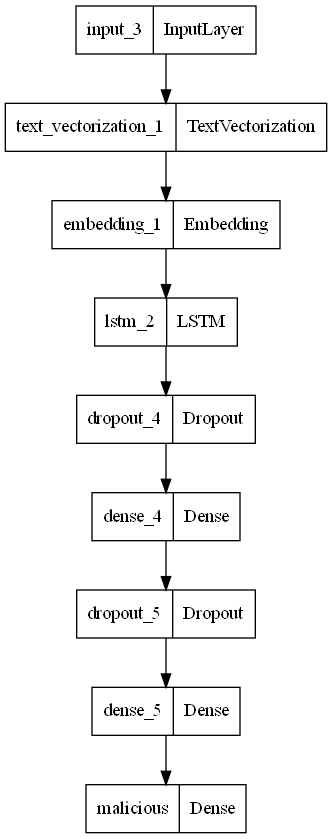

In [44]:
from tensorflow.keras.utils import plot_model
plot_model(model_LSTM)

In [45]:
model_LSTM.compile(optimizer= tf.keras.optimizers.Adamax(learning_rate=1e-5 ) ,   
                     loss = 'binary_crossentropy' , metrics= "accuracy" )

In [46]:
model_LSTM.fit(x = x_train , y = y_train , batch_size=512, epochs=30, validation_data=(x_val , y_val))

Epoch 1/30
1446/1446 [==============================] - 18s 9ms/step - loss: 0.5786 - accuracy: 0.9454 - val_loss: 0.3219 - val_accuracy: 0.9462
Epoch 2/30
1446/1446 [==============================] - 12s 8ms/step - loss: 0.1748 - accuracy: 0.9460 - val_loss: 0.1273 - val_accuracy: 0.9462
Epoch 3/30
1446/1446 [==============================] - 12s 8ms/step - loss: 0.1155 - accuracy: 0.9466 - val_loss: 0.0860 - val_accuracy: 0.9489
Epoch 4/30
1446/1446 [==============================] - 12s 8ms/step - loss: 0.0620 - accuracy: 0.9695 - val_loss: 0.0393 - val_accuracy: 0.9940
Epoch 5/30
1446/1446 [==============================] - 12s 9ms/step - loss: 0.0303 - accuracy: 0.9982 - val_loss: 0.0206 - val_accuracy: 0.9989
Epoch 6/30
1446/1446 [==============================] - 12s 8ms/step - loss: 0.0178 - accuracy: 0.9989 - val_loss: 0.0135 - val_accuracy: 0.9989
Epoch 7/30
1446/1446 [==============================] - 12s 8ms/step - loss: 0.0124 - accuracy: 0.9989 - val_loss: 0.0103 - val_ac

In [47]:
def plot_hist(hist):
    plt.plot(hist.history.history["loss"])
    plt.plot(hist.history.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

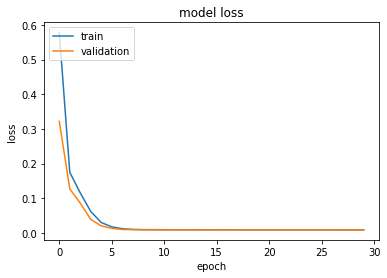

In [48]:
plot_hist(model_LSTM)

In [50]:
model_LSTM.evaluate(x_test , y_test)

4955/4955 [==============================] - 16s 3ms/step - loss: 0.0079 - accuracy: 0.9990


[0.007850918918848038, 0.9990286231040955]

In [57]:
model_LSTM.save("lstm.tf")

INFO:tensorflow:Assets written to: lstm.tf\assets


INFO:tensorflow:Assets written to: lstm.tf\assets


In [58]:
model_LSTM.save("lstm.hfd5")

INFO:tensorflow:Assets written to: lstm.hfd5\assets


INFO:tensorflow:Assets written to: lstm.hfd5\assets
